### 19BCE1160_LPS9_CSE4020

# **Lab Practice Sheet 9**
## **Perceptron & Multi-layer Perceptron**

### Name: Yash Vardhan Sharma
### Reg. No.: 19BCE1097
### Faculty:  Dr L Jeganathan

## **Code of Academic Integrity**
I affirm that
* This work is my own original work and is not a borrowed work,
either from other students or from assignments for other courses.
* I have not given or received any unauthorized help on this assignment.
* This submission is free from
<ul>
  <li>Plagiarism</li>
  <li>Fabrication of facts</li>
  <li>Unauthorized assistance</li>
  <li>Collusion</li>
</ul>
* This submission gives proper credit to sources and references,
acknowledges the contributions and ideas of others relevant to
this academic work.
* This submission was prepared by me fully adhering to the rules
that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in
any other behavior that subverts the purpose of the assignment
and the directions of the teacher.

### Importing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
from sklearn import metrics

### 1. Train a SKlearn MLP classifier model with a 2-class dataset of your choice. Conduct four different experiments with the activation functions as: linear, relu, sigmoid and Tanh respectively. 
### Based on the output of your experiments, conclude which activation function makes the MLP classifier learns better.

In [ ]:
# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)

In [ ]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Assign data from first four columns to X variable (feature vector)
X = irisdata.iloc[:, 0:4]
# Assign data from first fifth columns to y variable (label vector)
y = irisdata.select_dtypes(include=[object])

In [ ]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
y.Class.unique()

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=43)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 1. Linear

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='identity', solver='sgd', max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='identity', hidden_layer_sizes=(10, 10, 10),
              max_iter=1000, solver='sgd')

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



#### 2. Relu

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='sgd', max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, solver='sgd')

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



#### 3. Sigmoid

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='logistic', solver='sgd', max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10, 10),
              max_iter=1000, solver='sgd')

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 0 13  0]
 [ 0  8  0]
 [ 0  9  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.27      1.00      0.42         8
           2       0.00      0.00      0.00         9

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



#### 4. Tanh

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='tanh', solver='sgd', max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10, 10), max_iter=1000,
              solver='sgd')

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### 3. Train a Perceptron model with a linear dataset (with two classes) which and train a MLP model for the same data set and record your observations on the best model for the chosen data set with appropriate justification.


In [ ]:
# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)

In [ ]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Preprocessing

In [ ]:
#  Assign data from first four columns to X variable (feature vector)
X = irisdata.iloc[:, 0:4]
# Assign data from first fifth columns to y variable (label vector)
y = irisdata.select_dtypes(include=[object])

In [ ]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
y.Class.unique()

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=43)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# define model
model = Perceptron(eta0=0.0001)
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train.values.ravel())
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.842
Config: {'max_iter': 10}
>0.800 with: {'max_iter': 1}
>0.842 with: {'max_iter': 10}
>0.842 with: {'max_iter': 100}
>0.842 with: {'max_iter': 1000}
>0.842 with: {'max_iter': 10000}


#### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='sgd', max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, solver='sgd')

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,predictions)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.9666666666666667


### 5. Generate a dataset governed by the equation y = 2x1^2 + 3x2 using ‘gen regression symbolic’. Train a Perceptron model with different hypothesis (all the possible 2^3 polynimials of degree 2 in two variables) with the generated datset, to compute the equation that relates x1, x2 and y. That is, you have to run eight experiments in the perceptron model with the different hypothesis (each hypothesis is a polynomial of degree in two variables). Compare the output of your experiments with the original equation : y = 2x1^2 + 3x2 and decide which hypothesis had made the perceptron model to learn better


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Defining gen_regression_symbolic
def symbolize(s):
    """
    Converts a a string (equation) to a SymPy symbol object
    """
    from sympy import sympify
    s1=s.replace('.','*')
    s2=s1.replace('^','**')
    s3=sympify(s2)
    
    return(s3)
def eval_multinomial(s,vals=None,symbolic_eval=False):
    """
    Evaluates polynomial at vals.
    vals can be simple list, dictionary, or tuple of values.
    vals can also contain symbols instead of real values provided those symbols have been declared before using SymPy
    """
    from sympy import Symbol
    sym_s=symbolize(s)
    sym_set=sym_s.atoms(Symbol)
    sym_lst=[]
    for s in sym_set:
        sym_lst.append(str(s))
    sym_lst.sort()
    if symbolic_eval==False and len(sym_set)!=len(vals):
        print("Length of the input values did not match number of variables and symbolic evaluation is not selected")
        return None
    else:
        if type(vals)==list:
            sub=list(zip(sym_lst,vals))
        elif type(vals)==dict:
            l=list(vals.keys())
            l.sort()
            lst=[]
            for i in l:
                lst.append(vals[i])
            sub=list(zip(sym_lst,lst))
        elif type(vals)==tuple:
            sub=list(zip(sym_lst,list(vals)))
        result=sym_s.subs(sub)
    
    return result
def flip(y,p):
    import numpy as np
    lst=[]
    for i in range(len(y)):
        f=np.random.choice([1,0],p=[p,1-p])
        lst.append(f)
    lst=np.array(lst)
    return np.array(np.logical_xor(y,lst),dtype=int)
def gen_regression_symbolic(m=None,n_samples=100,n_features=2,noise=0.0,noise_dist='normal'):
    """
    Generates regression sample based on a symbolic expression. Calculates the output of the symbolic expression 
    at randomly generated (drawn from a Gaussian distribution) points
    m: The symbolic expression. Needs x1, x2, etc as variables and regular python arithmatic symbols to be used.
    n_samples: Number of samples to be generated
    n_features: Number of variables. This is automatically inferred from the symbolic expression. So this is ignored 
                in case a symbolic expression is supplied. However if no symbolic expression is supplied then a 
                default simple polynomial can be invoked to generate regression samples with n_features.
    noise: Magnitude of Gaussian noise to be introduced (added to the output).
    noise_dist: Type of the probability distribution of the noise signal. 
    Currently supports: Normal, Uniform, t, Beta, Gamma, Poission, Laplace

    Returns a numpy ndarray with dimension (n_samples,n_features+1). Last column is the response vector.
    """
    
    import numpy as np
    from sympy import Symbol,sympify
    
    if m==None:
        m=''
        for i in range(1,n_features+1):
            c='x'+str(i)
            c+=np.random.choice(['+','-'],p=[0.5,0.5])
            m+=c
        m=m[:-1]
    sym_m=sympify(m)
    n_features=len(sym_m.atoms(Symbol))
    evals=[]
    lst_features=[]
    
    for i in range(n_features):
        lst_features.append(np.random.normal(scale=5,size=n_samples))
    lst_features=np.array(lst_features)
    lst_features=lst_features.T
    lst_features=lst_features.reshape(n_samples,n_features)
    
    for i in range(n_samples):
        evals.append(eval_multinomial(m,vals=list(lst_features[i])))
    
    evals=np.array(evals)
    evals=evals.reshape(n_samples,1)
    
    if noise_dist=='normal':
        noise_sample=noise*np.random.normal(loc=0,scale=1.0,size=n_samples)
    elif noise_dist=='uniform':
        noise_sample=noise*np.random.uniform(low=0,high=1.0,size=n_samples)
    elif noise_dist=='beta':
        noise_sample=noise*np.random.beta(a=0.5,b=1.0,size=n_samples)
    elif noise_dist=='Gamma':
        noise_sample=noise*np.random.gamma(shape=1.0,scale=1.0,size=n_samples)
    elif noise_dist=='laplace':
        noise_sample=noise*np.random.laplace(loc=0.0,scale=1.0,size=n_samples)
        
    noise_sample=noise_sample.reshape(n_samples,1)
    evals=evals+noise_sample
        
    x=np.hstack((lst_features,evals))
    
    return (x)

In [ ]:
def MLPRegression(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
    classifier = MLPRegressor(hidden_layer_sizes=1, alpha=0.1,max_iter=500,activation = 'logistic',solver='adam',random_state=43)

    #Fitting the training data to the network
    classifier.fit(X_train, y_train)

    #Predicting y for X_val
    y_pred = classifier.predict(X_test)

    print("R2 score: ", metrics.r2_score(y_test, y_pred))

In [ ]:
x = gen_regression_symbolic(m='2*x1^2 + 3*x2', n_samples=500, noise=0.1, n_features=2)
df = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['y'])
MLPRegression(df)

R2 score:  -0.46778908767578153


In [ ]:
x = gen_regression_symbolic(m='2*x1^2 + 3*x2^2', n_samples=500, noise=0.1, n_features=2)
df1 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['y'])
MLPRegression(df1)

R2 score:  -1.162512794137811


In [ ]:
x = gen_regression_symbolic(m='2*x1^2 + x2', n_samples=500, noise=0.1, n_features=2)
df2 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['y'])
MLPRegression(df2)

R2 score:  -0.6209948216005128


In [ ]:
x = gen_regression_symbolic(m='x1^2 + 3*x2', n_samples=500, noise=0.1, n_features=2)
df3 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['y'])
MLPRegression(df3)

R2 score:  -0.2210266293124723


In [ ]:
x = gen_regression_symbolic(m='x1 + 3*x2^2', n_samples=500, noise=0.1, n_features=2)
df4 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['y'])
MLPRegression(df4)

R2 score:  -0.635688151637056


In [ ]:
x = gen_regression_symbolic(m='2*x1 + x2^2', n_samples=500, noise=0.1, n_features=2)
df5 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['y'])
MLPRegression(df5)

R2 score:  -0.4386519814382466


In [ ]:
x = gen_regression_symbolic(m='4*x1^2 + 7*x2', n_samples=500, noise=0.1, n_features=2)
df6 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['y'])
MLPRegression(df6)

R2 score:  -0.4221731985783346


In [ ]:
x = gen_regression_symbolic(m='7*x1^2 + 3*x2', n_samples=500, noise=0.1, n_features=2)
df7 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['y'])
MLPRegression(df7)

R2 score:  -0.3280979131562709


In [ ]:
x = gen_regression_symbolic(m='x1 + 7*x2^2', n_samples=500, noise=0.1, n_features=2)
df8 = pd.DataFrame(x, columns = ['x1'] + ['x2'] + ['y'])
MLPRegression(df8)

R2 score:  -0.8391882500254857


### 6. There are 23 parameters in ‘sklearn MLP classifier’ (https:scikit-learn.orgstablemodulesgeneratedsklearn.neural network.MLPClassifier.html). Understand the interpretation of different values that can be assigned to each of the 23 parameters. Conduct the experiment with P1 where P1 is a 23-tuple ( a set of 23 values with a value for each parameter). Choose another set of 23-values, P2, for the parameters of the MLP classifier such that, values of none of the 23 paramemters are same. Consider a 2-class data set. Classify the data using sklearn MLP classifier with P1 and P2 separately. Illustrate the impact of the change in the values of the parameter, as reflected in the output of your experiment.


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

def MLP(df, p1, p2, p3, act, solve, alpha, batch, learn, rate, power, itr, shufle, rand, total, verb, warm, mom, n_mom, stop, val, beta1, beta2, epsl, nitr, fun):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=43)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    mlp = MLPClassifier(hidden_layer_sizes=(p1, p2, p3), activation=act,
                        solver=solve, alpha=alpha, batch_size=batch, 
                        learning_rate = learn, learning_rate_init=rate, 
                        power_t=power, max_iter=itr, shuffle=shufle, random_state=rand,
                        tol = total, verbose=verb, warm_start=warm, momentum=mom,
                        nesterovs_momentum=n_mom, early_stopping=stop, 
                        validation_fraction=val, beta_1=beta1, beta_2=beta2, 
                        epsilon=epsl, n_iter_no_change=10, max_fun=fun)
    mlp.fit(X_train, y_train.values.ravel())

    y_preds = mlp.predict(X_test)

    def accuracy(confusion_matrix):
        diagonal_sum = confusion_matrix.trace()
        sum_of_all_elements = confusion_matrix.sum()
        return diagonal_sum / sum_of_all_elements

    cm = confusion_matrix(y_test, y_preds)
    print("Accuracy of MLPClassifier : ", accuracy(cm))
    print("\n")
    sns.heatmap(cm, annot = True) 
    print(classification_report(y_test,y_preds))

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Apoorv-17/Datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 1st Parameters P1

Accuracy of MLPClassifier :  0.7272727272727273


              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



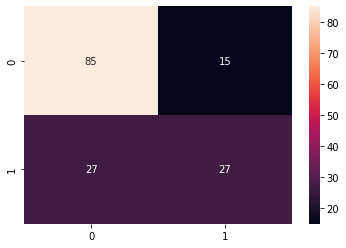

In [ ]:
MLP(df, 10, 10, 10, 'relu', 'adam', 0.0001, 'auto', 'constant', 0.001, 0.5, 200, True, None, 1e-4, False, False, 0.9, True, False, 0.1, 0.9, 0.999, 1e-8, 10, 15000)

#### 2nd Parameters P2

Iteration 1, loss = 0.66239452
Validation score: 0.714286
Iteration 2, loss = 0.65304165
Validation score: 0.714286
Iteration 3, loss = 0.65299309
Validation score: 0.714286
Iteration 4, loss = 0.65298570
Validation score: 0.714286
Iteration 5, loss = 0.65297883
Validation score: 0.714286
Iteration 6, loss = 0.65297198
Validation score: 0.714286
Iteration 7, loss = 0.65296515
Validation score: 0.714286
Iteration 8, loss = 0.65295833
Validation score: 0.714286
Iteration 9, loss = 0.65295153
Validation score: 0.714286
Iteration 10, loss = 0.65294474
Validation score: 0.714286
Accuracy of MLPClassifier :  0.6493506493506493


              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



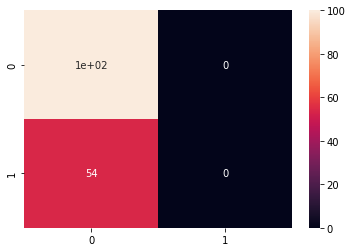

In [ ]:
MLP(df, 100, 100, 100, 'logistic', 'sgd', 0.001, 10, 'adaptive', 0.01, 0.05, 10, False, 43, 1e-6, True, True, 0.1, False, True, 0.01, 0.7, 0.99, 1e-6, 100, 1500)

Infernce:


### 7. Consider a multivariate multi-class data set. Train Sklearn MLP classifier with your data set with three hidden layers, such that the each hidden layer can have a maximum of 100 perceptrons in each layer. Conduct a sequence of experiments to find the optimum number of perceptrons in each hidden layers, which trains the classifier well.

In [ ]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/Apoorv-17/Datasets/main/diabetes.csv", sep = ',')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Resample uses bootstrapping method to regenerate samples by randomly selecting data for each class.
from sklearn.utils import resample
df_0 = diabetes[diabetes['Outcome'] == 0]
df_1 = diabetes[diabetes['Outcome'] == 1]

# Apply resample
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state= 123)

df = pd.concat([df_0,df_1_upsample])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

def MLPCliassification(df, h1, h2, h3):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20)

    #Initializing the MLPClassifier
    classifier = MLPClassifier(hidden_layer_sizes=(h1,h2,h3),
                               alpha=0.1,
                               max_iter=500,
                               activation = 'relu',
                               solver='adam',
                               random_state=43)
    #Fitting the training data to the network
    classifier.fit(X_train, Y_train)

    #Predicting y for X_val
    y_pred = classifier.predict(X_test)

    #Comparing the predictions against the actual observations in y_val
    cm = confusion_matrix(y_pred, Y_test)

    #Printing the accuracy
    print("Accuracy of MLPClassifier : ", accuracy(cm))
    print("\n")

    sns.heatmap(confusion_matrix(Y_test, y_pred), annot = True) 

    print(classification_report(Y_test, y_pred))

Accuracy of MLPClassifier :  0.755


              precision    recall  f1-score   support

           0       0.74      0.77      0.75        98
           1       0.77      0.75      0.76       102

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200



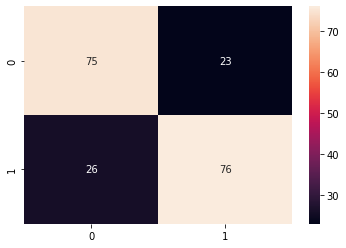

In [ ]:
MLPCliassification(df, 100,100,50)

Accuracy of MLPClassifier :  0.705


              precision    recall  f1-score   support

           0       0.81      0.55      0.66       103
           1       0.65      0.87      0.74        97

    accuracy                           0.70       200
   macro avg       0.73      0.71      0.70       200
weighted avg       0.73      0.70      0.70       200



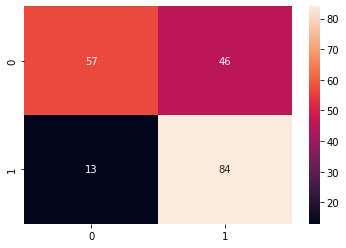

In [ ]:
MLPCliassification(df, 100, 50, 50)

Accuracy of MLPClassifier :  0.72


              precision    recall  f1-score   support

           0       0.67      0.88      0.76       102
           1       0.82      0.55      0.66        98

    accuracy                           0.72       200
   macro avg       0.74      0.72      0.71       200
weighted avg       0.74      0.72      0.71       200



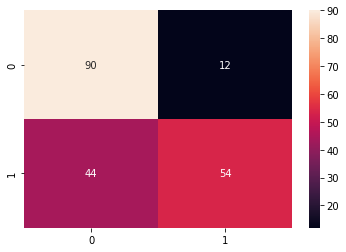

In [ ]:
MLPCliassification(df, 60,60,60)

Accuracy of MLPClassifier :  0.725


              precision    recall  f1-score   support

           0       0.71      0.81      0.76       106
           1       0.75      0.63      0.68        94

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.72       200
weighted avg       0.73      0.72      0.72       200



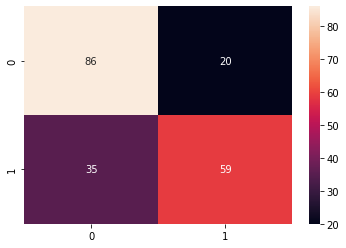

In [ ]:
MLPCliassification(df, 50, 50, 50)

Accuracy of MLPClassifier :  0.695


              precision    recall  f1-score   support

           0       0.69      0.71      0.70        99
           1       0.70      0.68      0.69       101

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200



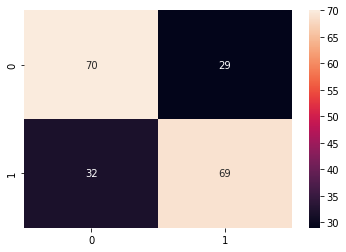

In [ ]:
MLPCliassification(df, 30,25,25)